# Data Training and Testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn import tree, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import \
    classification_report, \
    plot_confusion_matrix, \
    confusion_matrix, \
    roc_curve, \
    auc

sns.set_theme()

In [2]:
def load_data(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

def plot_ROC(y_test, y_pred, plt_config):    
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=plt_config['figsize'])
        plt.title('ROC')
        plt.plot(fpr, tpr, 'b', label='ROC-AUC = %0.2f' % roc_auc)
        plt.plot([0,1], [0,1], 'y--', label='baseline')

        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc='best')
        plt.show()

def decisionTreeTrain(X_train, y_train, max_depth):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    return clf

In [3]:
df = load_data('../csv_data/user_1.csv')

In [4]:
df

,timestamp,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving,class
0,2022-04-17 20:58:59,628.077,230.35100,5764.60,5094.55,74.2955,0,0,1,0,0,0,0
1,2022-04-17 20:59:00,984.680,0.00000,NaN,NaN,74.2955,0,0,3,0,0,0,0
2,2022-04-17 20:59:01,1247.550,29.78360,5807.95,5296.89,64.6675,0,0,1,0,0,0,0
3,2022-04-17 20:59:02,1300.780,28.94940,5955.68,5187.03,81.9060,12,0,0,0,0,0,0
4,2022-04-17 20:59:03,1363.450,3.18005,7257.50,7221.94,80.5923,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17294,2022-04-18 02:47:57,1200.150,0.00000,2560.58,2416.79,83.2115,0,0,0,0,0,0,0
17295,2022-04-18 02:47:58,1266.950,0.00000,2746.02,2625.07,83.2115,0,0,0,0,0,0,0
17296,2022-04-18 02:47:59,1221.210,0.00000,2996.24,2868.48,83.2115,0,0,1,0,0,0,0
17297,2022-04-18 02:48:00,1228.330,0.00000,3231.47,3080.77,83.2115,0,0,1,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

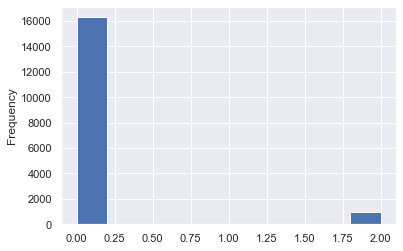

In [5]:
df['class'].plot.hist()

In [6]:
df = df.fillna(-10000)
# df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df = df.replace((np.inf, -np.inf), 0).reset_index(drop=True)

data_X = df.drop(columns = ['timestamp', 'class'])
data_y = df['class']

# data_y = data_y.replace(2, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3)

X_train

,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving
7079,0.0000,0.00000,-10000.00,-10000.00,-10000.0000,4,2,1,0,0,0
4870,1930.7000,1.89820,-10000.00,-10000.00,42.0706,13,0,0,0,0,1
16705,198.7640,41.05930,-10000.00,-10000.00,-10000.0000,50,1,2,0,0,1
7835,371.7350,6.81377,-10000.00,-10000.00,-10000.0000,2,0,0,0,0,1
5188,1535.2500,9.62354,-10000.00,-10000.00,60.3605,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13777,32.3963,0.00000,-10000.00,-10000.00,140.4840,63,2,0,0,0,1
3384,0.0000,54.83970,-10000.00,-10000.00,-10000.0000,0,0,0,0,0,0
7240,295.0680,34.33130,-10000.00,-10000.00,-10000.0000,9,0,0,0,0,1
13990,336.4350,4.05223,7607.87,7481.86,11.3706,5,2,2,0,0,1


In [8]:
def scalar_normalize(X_train, X_test):
    min_max_scalar = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scalar.fit_transform(X_train)
    X_test_minmax = min_max_scalar.transform(X_test)
    X_train_scaled = preprocessing.scale(X_train_minmax)
    X_test_scaled = preprocessing.scale(X_test_minmax)
    X_train_normalized = preprocessing.normalize(X_train_scaled, norm='l2')
    X_test_normalized = preprocessing.normalize(X_test_scaled, norm='l2')
    return X_train_normalized, X_test_normalized

# X_train, X_test = scalar_normalize(X_train, X_test)

In [9]:
# model = KNeighborsClassifier(n_neighbors=7)
# model.fit(X_train, y_train)
model = decisionTreeTrain(X_train, y_train, max_depth=4)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4909
           2       0.70      0.50      0.58       281

    accuracy                           0.96      5190
   macro avg       0.84      0.74      0.78      5190
weighted avg       0.96      0.96      0.96      5190



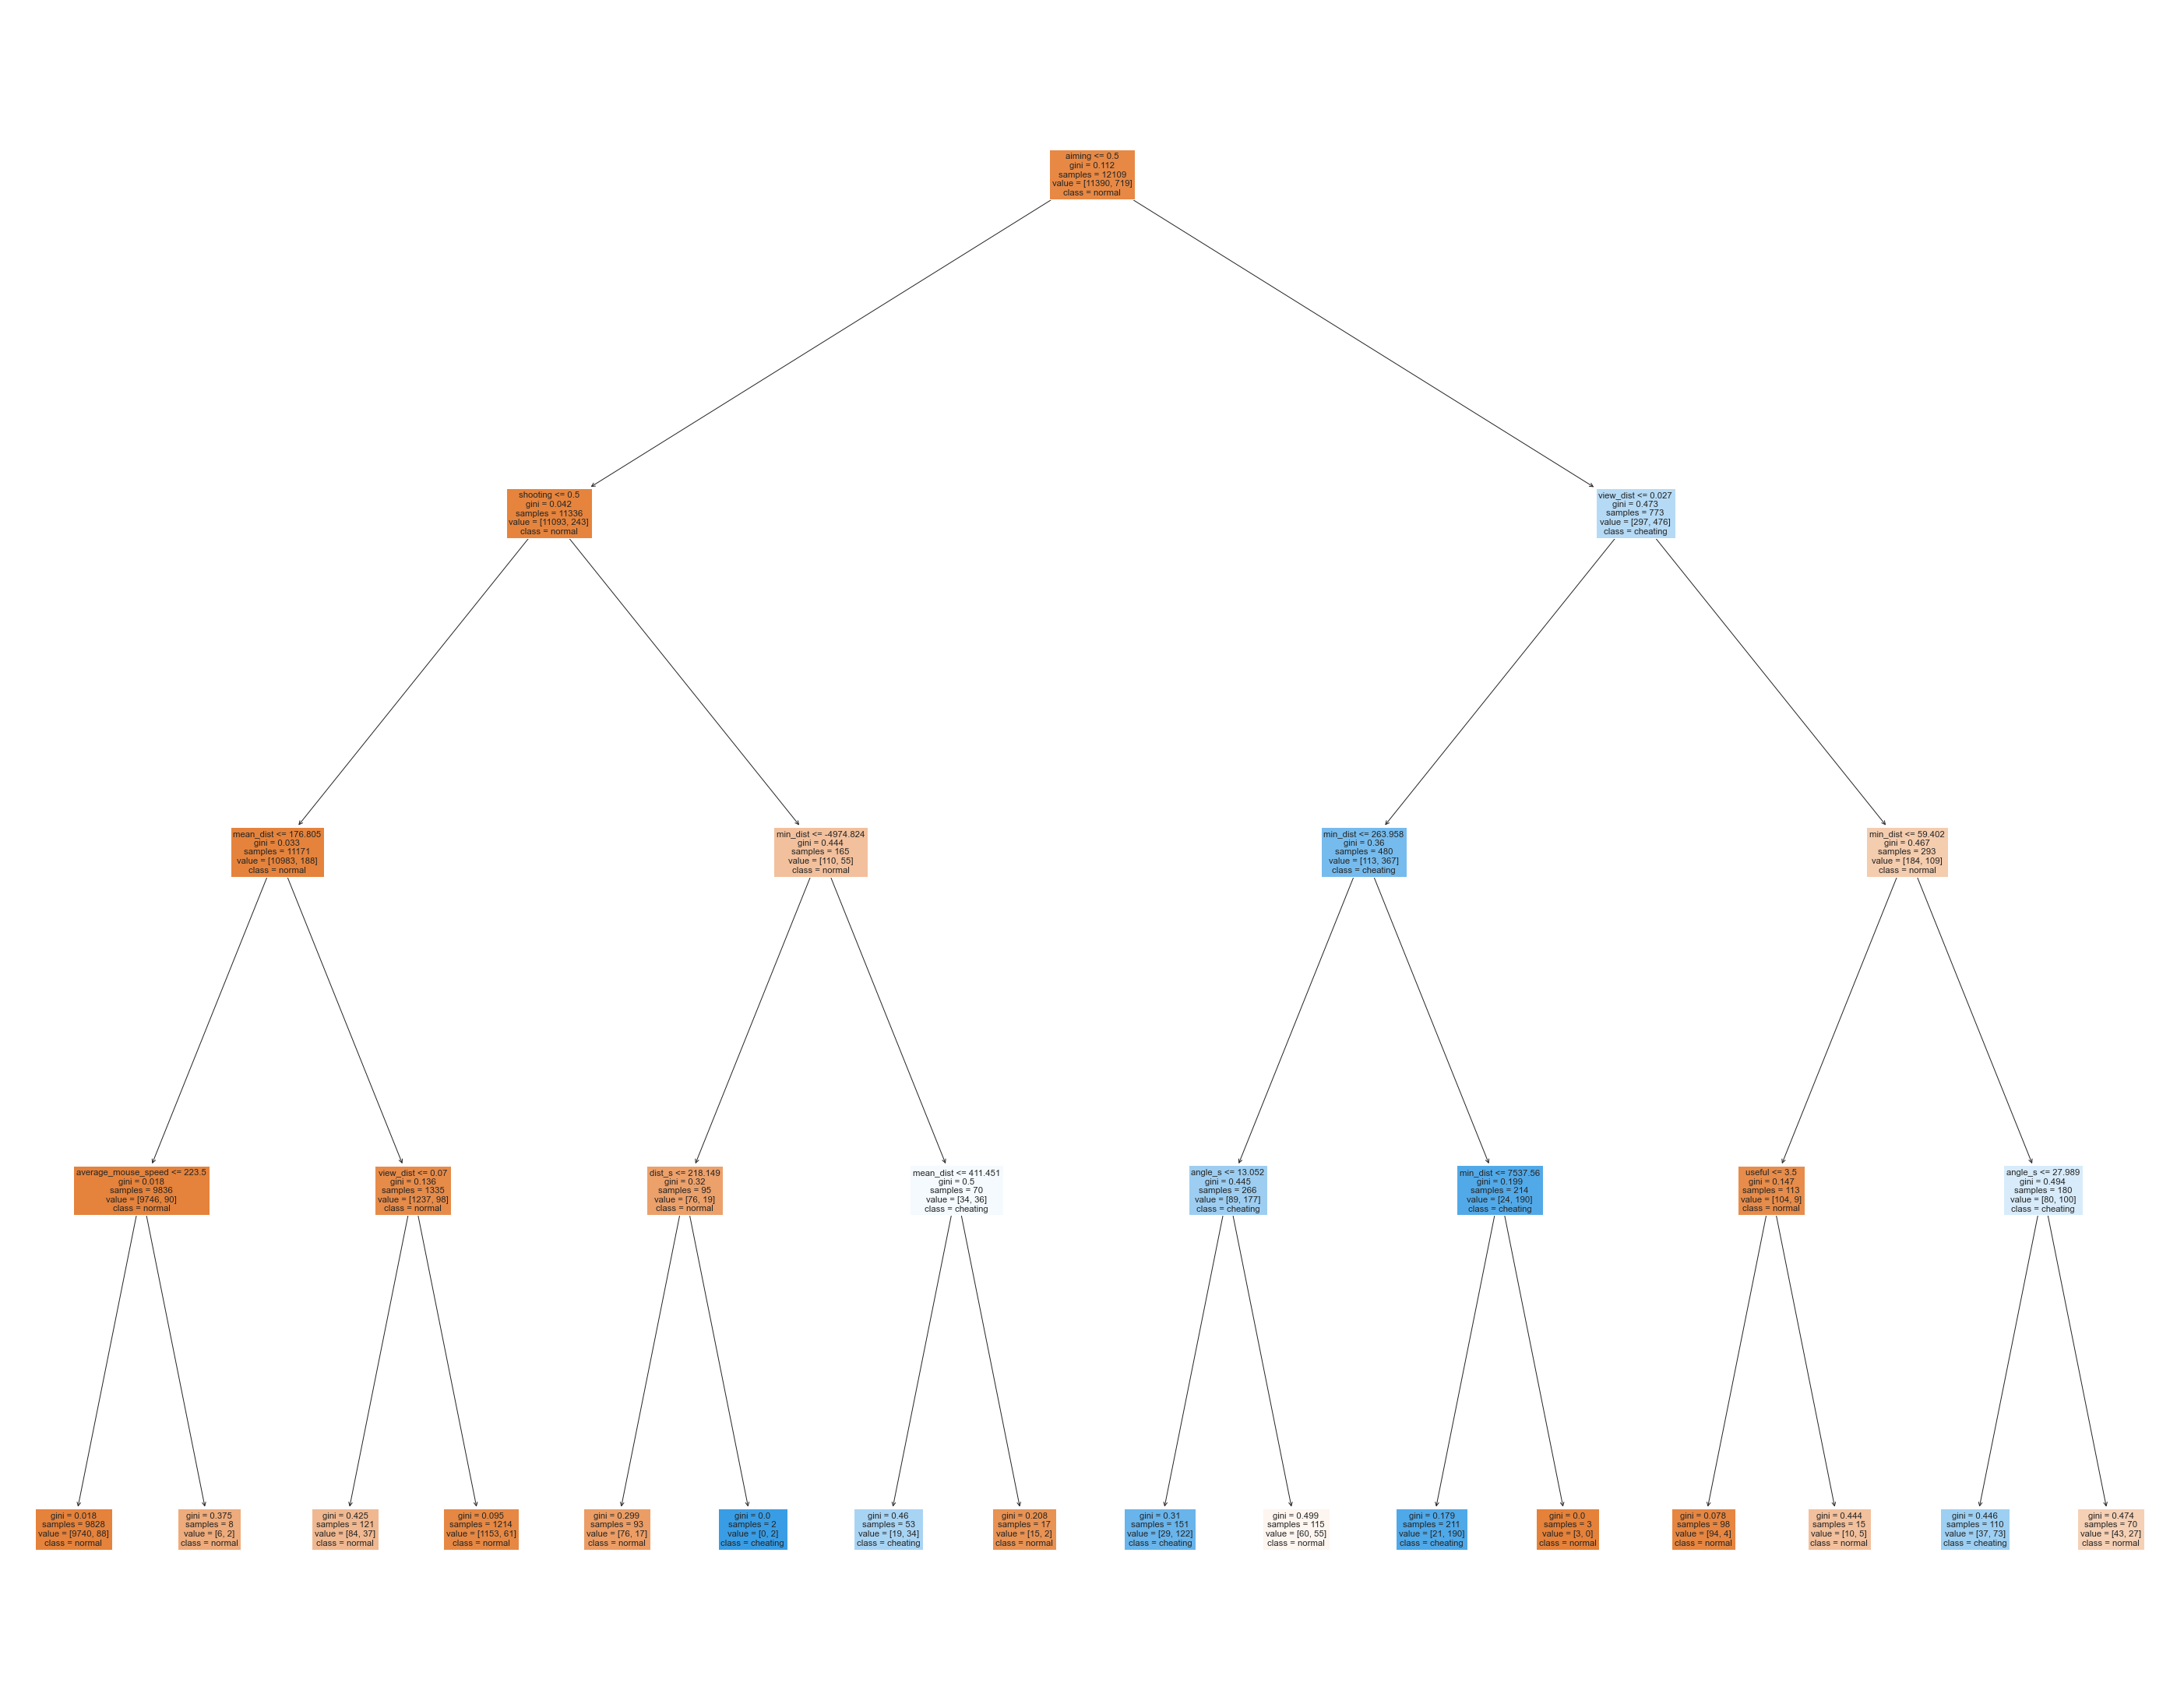

In [10]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(model, feature_names=X_train.columns, \
    class_names = ['normal', 'cheating'], filled = True)

In [11]:
# try to do binary classification
data_X = data_X
binary_data_y = data_y.copy()
binary_data_y[binary_data_y>0] = 1

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_X, binary_data_y, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4888
           1       0.51      0.34      0.41       302

    accuracy                           0.94      5190
   macro avg       0.74      0.66      0.69      5190
weighted avg       0.93      0.94      0.94      5190



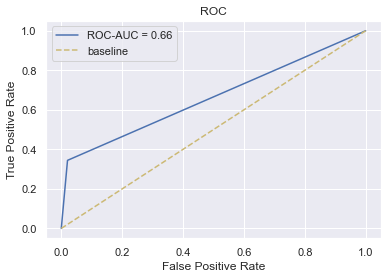

In [13]:
plt_config = {
    'figsize': (6, 4),
    # 'model': ad.mode + ' Detection'
}

plot_ROC(y_test, y_hat, plt_config)

In [14]:
# try SVM
svmclf = make_pipeline(preprocessing.StandardScaler(), SVC(kernel = 'rbf', gamma='auto', degree=1))
svmclf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=1, gamma='auto'))])

In [15]:
y_hat = svmclf.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4888
           1       0.73      0.64      0.68       302

    accuracy                           0.97      5190
   macro avg       0.85      0.81      0.83      5190
weighted avg       0.96      0.97      0.96      5190



In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.from_numpy(X_train.to_numpy().astype(np.double)).double()
y_train = torch.from_numpy(y_train.to_numpy().T.astype(np.double)).double()

X_test = torch.from_numpy(X_test.to_numpy().astype(np.double)).double()
y_test = torch.from_numpy(y_test.to_numpy().T.astype(np.double)).double()

TrainDataset = TensorDataset(X_train, y_train)
TestDataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(TrainDataset, batch_size = 32, shuffle = False)
test_loader = DataLoader(TestDataset, batch_size = 32, shuffle = False)


In [17]:
X_train.shape


torch.Size([12109, 11])

In [18]:
import torch.nn as nn
import torch

is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
device = torch.device("cpu")


In [19]:
class SentimentNet(nn.Module):
    def __init__(self, output_size, input_dim, hidden_dim, n_layers, drop_prob=0.3):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        x = x.unsqueeze(0)
        batch_size = x.size(0)
        print(hidden)
        lstm_out, hidden = self.lstm(x, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [20]:
output_size = 1
input_dim = 11
hidden_dim = 32
n_layers = 2

model = SentimentNet(output_size, input_dim, hidden_dim, n_layers)
model.to(device)
model = model

lr=0.05
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [22]:
epochs = 10
counter = 0
print_every = 500
clip = 5
valid_loss_min = np.Inf

model.train()
for i in range(epochs):
    h = model.init_hidden(1)
    
    for inputs, labels in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        model.zero_grad()
        print(inputs)
        print(h)
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
        if counter%print_every == 0:
            val_h = model.init_hidden(1)
            val_losses = []
            model.eval()
            for inp, lab in val_loader:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(device), lab.to(device)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())
                
            model.train()
            print("Epoch: {}/{}...".format(i+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            if np.mean(val_losses) <= valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

tensor([[ 1.8103e+02,  3.1506e+01, -1.0000e+04, -1.0000e+04, -1.0000e+04,
          1.7000e+01,  2.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,
          1.0000e+00],
        [ 2.2582e+02,  2.1270e+01, -1.0000e+04, -1.0000e+04, -1.0000e+04,
          2.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
          1.0000e+00],
        [ 2.4249e+02,  4.1817e+01, -1.0000e+04, -1.0000e+04, -1.0000e+04,
          2.0000e+00,  2.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,
          1.0000e+00],
        [ 1.7840e+02,  2.8788e+01,  6.1768e+03,  6.0077e+03,  1.2918e+01,
          7.0000e+00,  1.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,
          1.0000e+00],
        [ 1.8077e+02,  3.3562e+01,  3.8608e+03,  3.7909e+03,  1.6897e+02,
          9.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          1.0000e+00],
        [ 8.8755e+01,  1.5433e+02, -1.0000e+04, -1.0000e+04, -1.0000e+04,
          5.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+0

RuntimeError: expected scalar type Double but found Float